# PART A: Prerequisite for kNN implementation. (Q1. – Q.12 may help you to implement kNN on your own)

## 1. Create two vectors using NumPy and check how many values are equal in the two vectors.

In [792]:
import numpy as np

In [793]:
a=[1,6,7,9]
b=[1,0,6,9]
print(np.sum(np.array(a)==np.array(b)))

2


## 2. Matrix creation using NumPy

### a. Create a matrix M with 10 rows and 3 columns and populate with random values.

In [794]:
from random import randint
l=[]
for row in range(10):
    e=[]
    for col in range(3):
        e.append(randint(1,100))
    l.append(e)
print(l)

[[63, 57, 4], [59, 37, 54], [92, 75, 28], [2, 26, 62], [89, 11, 30], [35, 17, 87], [98, 66, 93], [91, 3, 50], [21, 50, 60], [77, 59, 84]]


In [795]:
M=np.array(l)

### b. Print size of M. (M.shape)

In [796]:
print(M.shape)

(10, 3)


### c. Print only the number of rows of M(M.shape[0])

In [797]:
print(M.shape[0])

10


### d. Print only the number of columns of M

In [798]:
print(M.shape[1])

3


### d. Print only the number of columns of M

In [799]:
for row in range(M.shape[0]):
    if M[row][0]+M[row][1] % 4 == 4:
        M[row][2]=1
    else:
        M[row][2]=0

In [800]:
print(M)

[[63 57  0]
 [59 37  0]
 [92 75  0]
 [ 2 26  1]
 [89 11  0]
 [35 17  0]
 [98 66  0]
 [91  3  0]
 [21 50  0]
 [77 59  0]]


## 3. Create pandas dataframe ‘df’ from the created matrix M and name the columns as X1, X2, and Y. (Refer Lab1)

In [801]:
import pandas as pd
import matplotlib.pyplot as plt

In [802]:
df=pd.DataFrame(M,columns=['X1','X2','Y'])

## 4. Plot X1 and X2 using scatter plot. Color (X1, X2) red if the corresponding Y is 1 else, blue.

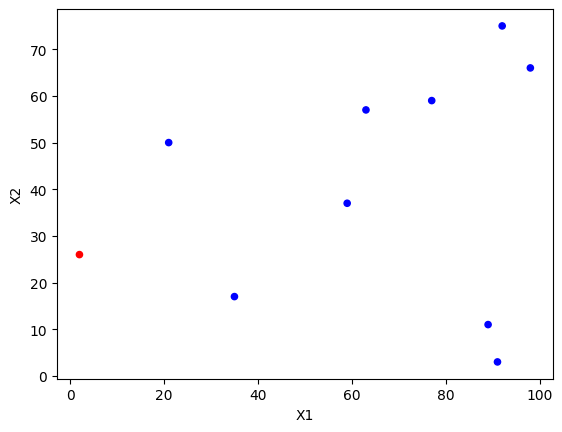

In [803]:
col = df.Y.map({0:'b', 1:'r'}) 
df.plot.scatter(x='X1', y='X2', c=col) 
plt.show()

## 5

### a. For two columns X1, X2, find squared error: (x1 – x2)^2

In [812]:
np.square(df.X1-df.X2)

0      36
1     484
2     289
3     576
4    6084
5     324
6    1024
7    7744
8     841
9     324
dtype: int32

### b. Find the sum of the squared error.

In [813]:
print(np.sum(np.square(df.X1-df.X2)))

17726


## 6. Find Euclidean distance between the first two rows of matrix M. 
Compare the result with the inbuilt function numpy.linalg.norm(a-b), where a is the first 
row and b is the second row.


In [814]:
def euclidean_distance(x,y):
    return np.sqrt(np.sum(np.square(x-y)))

In [816]:
print(euclidean_distance(M[0],M[1]))

20.396078054371138


In [817]:
np.linalg.norm(M[0]-M[1])

20.396078054371138

## 7. Create a vector V with two random values. Find the Euclidean distance between each row of M with V. Store the distance in a vector and print.

In [825]:
V=np.array([randint(1,100),randint(1,100)])

In [826]:
V

array([75, 18])

In [829]:
Vd=np.array([euclidean_distance(V,M[i][:2]) for i in range(M.shape[0])])

In [830]:
Vd

array([40.80441153, 24.8394847 , 59.48108943, 73.43704787, 15.65247584,
       40.01249805, 53.22593353, 21.9317122 , 62.76941931, 41.0487515 ])

## 8. Create a matrix A with 10 rows and 2 columns. Add a new column to a matrix. (Use np.column_stack). Add a new row to a matrix(Use np.vstack)

In [831]:
M2=[]
for row in range(10):
    e=[]
    for col in range(2):
        e.append(randint(1,100))
    M2.append(e) 

In [834]:
A=np.array(M2);print(A)

[[ 56  26]
 [ 28  33]
 [ 88  48]
 [ 43  77]
 [ 13 100]
 [ 35  96]
 [ 58  32]
 [100  37]
 [ 29  70]
 [ 43   6]]


In [835]:
C=np.array([randint(1,100) for i in range(10)]);print(C)

[16  6 91 74 95 88  8 72 58 15]


In [836]:
A=np.column_stack((A,C));print(A)

[[ 56  26  16]
 [ 28  33   6]
 [ 88  48  91]
 [ 43  77  74]
 [ 13 100  95]
 [ 35  96  88]
 [ 58  32   8]
 [100  37  72]
 [ 29  70  58]
 [ 43   6  15]]


In [837]:
R=np.array([randint(1,100) for i in range(3)]);print(R)

[75 95 24]


In [838]:
A=np.vstack((A,R));print(A)

[[ 56  26  16]
 [ 28  33   6]
 [ 88  48  91]
 [ 43  77  74]
 [ 13 100  95]
 [ 35  96  88]
 [ 58  32   8]
 [100  37  72]
 [ 29  70  58]
 [ 43   6  15]
 [ 75  95  24]]


## 9. Create a matrix M’ with two columns X1’ and X2’ and populate with random values. Find the Euclidean distance between each row of M’ with each row of M. Store the distance in a matrix Dist with 3 columns. The first column is the row id of M, the second column is the row id of M’, and the third column is the distance value. Compare the result with the following code

In [840]:
M=np.array([[randint(0,100)]*2]*10);print(M)

[[83 83]
 [83 83]
 [83 83]
 [83 83]
 [83 83]
 [83 83]
 [83 83]
 [83 83]
 [83 83]
 [83 83]]


In [861]:
dA=[]
for row1 in range(A.shape[0]):
    for row2 in range(A.shape[0]):
        dA.append([row1,row2,euclidean_distance(A[row1],A[row2])])

In [862]:
dA=np.array(dA);print(dA)

[[  0.           0.           0.        ]
 [  0.           1.          30.5450487 ]
 [  0.           2.          84.4570897 ]
 [  0.           3.          78.319857  ]
 [  0.           4.         116.47317288]
 [  0.           5.         102.59142264]
 [  0.           6.          10.19803903]
 [  0.           7.          72.0624729 ]
 [  0.           8.          66.55073253]
 [  0.           9.          23.87467277]
 [  0.          10.          72.01388755]
 [  1.           0.          30.5450487 ]
 [  1.           1.           0.        ]
 [  1.           2.         105.11898021]
 [  1.           3.          82.37111144]
 [  1.           4.         112.40551588]
 [  1.           5.         103.64362016]
 [  1.           6.          30.08321791]
 [  1.           7.          97.75479528]
 [  1.           8.          63.82789359]
 [  1.           9.          32.17141588]
 [  1.          10.          79.85612062]
 [  2.           0.          84.4570897 ]
 [  2.           1.         105.11

In [863]:
from sklearn.metrics.pairwise import euclidean_distances 
euclidean_distances(dA, dA)

array([[ 0.        , 30.56141358, 84.48076704, ..., 63.72597587,
        95.95311355, 14.14213562],
       [30.56141358,  0.        , 53.92131457, ..., 34.13784204,
        65.72000631, 33.37663854],
       [84.48076704, 53.92131457,  0.        , ..., 24.92731124,
        16.13269848, 85.42247948],
       ...,
       [63.72597587, 34.13784204, 24.92731124, ...,  0.        ,
        32.59465042, 62.45798588],
       [95.95311355, 65.72000631, 16.13269848, ..., 32.59465042,
         0.        , 95.01052573],
       [14.14213562, 33.37663854, 85.42247948, ..., 62.45798588,
        95.01052573,  0.        ]])

## 10. Sort the Dist matrix based on the last column. 
Use(print(a[a[:,n].argsort()])) where a is the matrix and n is the column based on which you need to sort.

In [865]:
dAs=dA[dA[:,2].argsort()]
print(dAs)

[[  0.           0.           0.        ]
 [  9.           9.           0.        ]
 [  8.           8.           0.        ]
 [  7.           7.           0.        ]
 [  6.           6.           0.        ]
 [  4.           4.           0.        ]
 [  3.           3.           0.        ]
 [  2.           2.           0.        ]
 [  1.           1.           0.        ]
 [  5.           5.           0.        ]
 [ 10.          10.           0.        ]
 [  6.           0.          10.19803903]
 [  0.           6.          10.19803903]
 [  8.           3.          22.38302929]
 [  3.           8.          22.38302929]
 [  4.           5.          23.43074903]
 [  5.           4.          23.43074903]
 [  0.           9.          23.87467277]
 [  9.           0.          23.87467277]
 [  5.           3.          24.91987159]
 [  3.           5.          24.91987159]
 [  7.           2.          25.01999201]
 [  2.           7.          25.01999201]
 [  6.           1.          30.08

## 11. Get the initial k rows from the sorted matrix


In [887]:
k=100
dAs[:k]

array([[ 0.        ,  0.        ,  0.        ],
       [ 9.        ,  9.        ,  0.        ],
       [ 8.        ,  8.        ,  0.        ],
       [ 7.        ,  7.        ,  0.        ],
       [ 6.        ,  6.        ,  0.        ],
       [ 4.        ,  4.        ,  0.        ],
       [ 3.        ,  3.        ,  0.        ],
       [ 2.        ,  2.        ,  0.        ],
       [ 1.        ,  1.        ,  0.        ],
       [ 5.        ,  5.        ,  0.        ],
       [10.        , 10.        ,  0.        ],
       [ 6.        ,  0.        , 10.19803903],
       [ 0.        ,  6.        , 10.19803903],
       [ 8.        ,  3.        , 22.38302929],
       [ 3.        ,  8.        , 22.38302929],
       [ 4.        ,  5.        , 23.43074903],
       [ 5.        ,  4.        , 23.43074903],
       [ 0.        ,  9.        , 23.87467277],
       [ 9.        ,  0.        , 23.87467277],
       [ 5.        ,  3.        , 24.91987159],
       [ 3.        ,  5.        , 24.919

## 12. Find the number of 1s and 0s in the k rows above. Print 1 if the number of 1s is more else, print 0.

In [888]:
c1,c0=0,0
for i in dAs[:k]:
    for j in range(3):
        if i[j]==0:
            c0+=1
        elif i[j]==1:
            c1+=1
if c1>c0:
    print('1')
else:
    print('0')

0


# PART B : KNN implementation

## a. Load diabetes dataset as done in Lab 1.

In [3]:
from pandas import read_csv
path='diabetes_dataset.csv'
data=read_csv(path)
print(data.shape) # to know the size of data

(768, 9)


## b. Peek at a few rows as done in Lab 1

In [4]:
print(data.head(4))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  


## c. Split the dataset into 80% training and 20% testing using numpy slicing.

In [5]:
traindata=round(data.shape[0]*0.8)
testdata=data.shape[0]-traindata

In [6]:
print(traindata,testdata)

614 154


## d. Use the inbuilt function to do splitting and interpret results

In [7]:
from sklearn.model_selection import train_test_split 
arr=data.values 
X=arr[:,0:8] 
Y=arr[:,8] 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20) 
print( X_test)

[[6.00e+00 1.14e+02 0.00e+00 ... 0.00e+00 1.89e-01 2.60e+01]
 [1.00e+01 1.62e+02 8.40e+01 ... 2.77e+01 1.82e-01 5.40e+01]
 [9.00e+00 1.64e+02 8.40e+01 ... 3.08e+01 8.31e-01 3.20e+01]
 ...
 [1.00e+00 8.40e+01 6.40e+01 ... 3.69e+01 4.71e-01 2.80e+01]
 [0.00e+00 1.98e+02 6.60e+01 ... 4.13e+01 5.02e-01 2.80e+01]
 [3.00e+00 8.80e+01 5.80e+01 ... 2.48e+01 2.67e-01 2.20e+01]]


## e. Do normalisation of training as well as testing dataset using StandardScaler as done in Lab 1. Is it required to execute the following code for X_test, too?

In [10]:
from sklearn.preprocessing import StandardScaler
import numpy


In [11]:
scaler=StandardScaler().fit(X_train) #fit data for standardization
rescaledX=scaler.transform(X_train) #convert the data as per (x-µ)/σ
numpy.set_printoptions(precision=3)
print(rescaledX[0:2,:])
print(X[0:2,:])

[[ 2.667  1.126  2.425 -1.318 -0.713  1.288 -0.666  0.897]
 [ 1.788 -1.635  1.987  0.105 -0.293  0.415 -0.581  1.153]]
[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]]


## f. Invoke inbuilt kNN function.

In [12]:
from sklearn.neighbors import KNeighborsClassifier   
classifier = KNeighborsClassifier(n_neighbors=5)   
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)

## g. Evaluate kNN

In [13]:
from sklearn.metrics import classification_report, confusion_matrix   
print(confusion_matrix(y_test, y_pred))   
print(classification_report(y_test, y_pred))

[[82 16]
 [31 25]]
              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78        98
         1.0       0.61      0.45      0.52        56

    accuracy                           0.69       154
   macro avg       0.67      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154



## h. Find the total number of correct predictions.

In [14]:
print(confusion_matrix(y_test, y_pred)[0][0]) 

82


## i. Repeat f, g, h for different values of k in kNN. And plot the graph

In [24]:
from sklearn.neighbors import KNeighborsClassifier   
classifier = KNeighborsClassifier(n_neighbors=5)   
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix   
print(confusion_matrix(y_test, y_pred))   
print(classification_report(y_test, y_pred))

[[82 16]
 [31 25]]
              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78        98
         1.0       0.61      0.45      0.52        56

    accuracy                           0.69       154
   macro avg       0.67      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154



In [26]:
print(confusion_matrix(y_test, y_pred)[0][0]) 

82


In [30]:
import pandas
import matplotlib.pyplot as plt


In [31]:
mydataframe = pandas.DataFrame(y_pred)
print(mydataframe)

       0
0    0.0
1    1.0
2    1.0
3    0.0
4    0.0
..   ...
149  0.0
150  0.0
151  0.0
152  1.0
153  0.0

[154 rows x 1 columns]


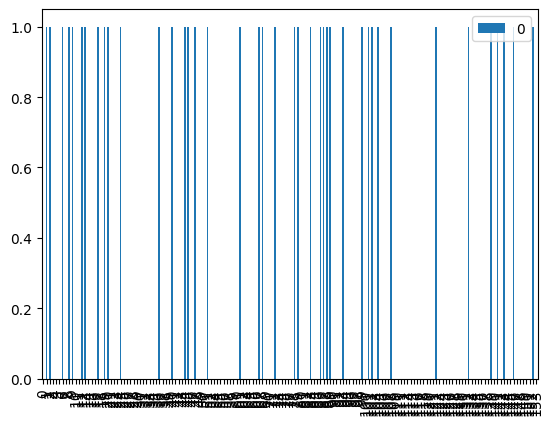

In [32]:
mydataframe.plot(kind='bar')
plt.show()